# Business Data Analytics - Exercise Unsupervised Learning

This notebook demonstrates how **clustering** and **dimensionality reduction** can be applied to segment customers based on their credit card usage behaviour. The code used throughout this tutorial is inspired by [Saba Naseem Butt's notebook on Kaggle](https://www.kaggle.com/code/sabanasimbutt/clustering-visualization-of-clusters-using-pca).

The notebook follows these steps:
1. Preprocessing 
2. Clustering
3. Interpreting the clusters
4. Visualising the results with PCA

### Import libraries

In [ ]:
!pip install -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from typing import List, Union

### Loading the data

In [2]:
# load data
data = pd.read_csv("data.csv")

The following variables are contained in the dataset:

- **CUST_ID**: Identification of Credit Card holder (Categorical)


- **BALANCE**: Balance amount left in their account to make purchases


- **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)


- **PURCHASES**: Amount of purchases made from account


- **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go


- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment


- **CASH_ADVANCE**: Cash in advance given by the user


- **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)


- **ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)


- **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)


- **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance being paid


- **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advanced"


- **PURCHASES_TRX**: Numbe of purchase transactions made


- **CREDIT_LIMIT**: Limit of Credit Card for user


- **PAYMENTS**: Amount of Payment done by user


- **MINIMUM_PAYMENTS**: Minimum amount of payments made by user


- **PRC_FULL_PAYMENT**: Percent of full payment paid by user


- **TENURE**: Tenure of credit card service for user

### Brief Exploratory Data Analysis

In [3]:
data.shape

(8950, 18)

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Checking the distribution of our data yields that we have lots of outliers
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# we have some missing values
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

### Preprocessing

Before we can feed our data into a clustering algorithm, we need to preprocess them.

#### Task: Imputing missing values

For the sake of simplicity, we can impute the missing values as the mean value. You can either use [sklearn's SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) or do it manually.

Use the cell below to answer this task

In [7]:
# impute missing values with mean 
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

#### Task: Bin numeric values

To cap outlier in our distributions and to provide interpretable results, it is sometimes useful to transform our numeric features into meaningful bins.

For instance, the balance column can be divided into 7 bins, so that 
- the 1st bin represents values between -inf < x <= 0
- the 2nd bin represents values between 0 < x <= 500
- the 3rd bin represents values between 500 < x <= 1000
- the 4th bin represents values between 1000 < x <= 3000
- the 5th bin represents values between 3000 < x <= 5000
- the 6th bin represents values between 5000 < x <= 10000
- the 7th bin represents values between 10000 < x <= inf

To do this for all our features, we will define a function that returns a pandas Series with the corresponding bin numbers for all values in a column of our dataframe. To illustrate the basic functionality, we can have a look at the example above. Assuming a balance of 256, the corresponding bin number will be 1 if we denote the first bin as 0. To make our function as flexible as possible it accepts a pandas Series that contains all the values to be binned and the corresponding binning thresholds as an input.

To get started, you can have a look at the [pandas.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) function. It provides some examples of how we can leverage this function for binning.

Use the cell below to define the function.

In [8]:
def apply_binning(series: pd.Series, thresholds: List[Union[int, float]]) -> pd.Series:
    
    # create tuples
    tuples = []
    
    for i in range(len(thresholds)):
        
        if i == 0:
            continue
            
        tuples.append((thresholds[i-1], thresholds[i]))
        
    # create bins and cuts
    bins = pd.IntervalIndex.from_tuples(tuples)    
    cuts = pd.cut(series, bins)
    
    # create mapping
    bins2integer = dict(zip(bins, list(range(len(bins)))))
    
    # series with integer values
    return cuts.map(bins2integer)

In [9]:
## first batch of column transformations
thresholds = [-np.inf, 0, 500, 1000, 3000, 5000, 10000, np.inf]

for column in ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']:    
    data[column] = apply_binning(series=data[column], thresholds=thresholds)

## second batch of column transformations
thresholds = [-np.inf, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, np.inf]

for column in ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']:
    data[column] = apply_binning(series=data[column], thresholds=thresholds)
    
## third batch of column transformations
thresholds = [-np.inf, 0, 5, 10, 15, 20, 30, 50, 100, np.inf]

for column in ['PURCHASES_TRX', 'CASH_ADVANCE_TRX']:
    data[column] = apply_binning(series=data[column], thresholds=thresholds)

In [10]:
# drop customer id since it is no longer needed 
data.drop(['CUST_ID'], axis=1, inplace=True)

#### Task: Feature Scaling

Since we will be using KMeans later on, we need to scale our input data so that each feature contributes equally to the distance measure.

Use the cell below to answer this task.

In [11]:
# scale input
scale = StandardScaler()
X = scale.fit_transform(data)

### Clustering

In this notebook section, we apply the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering in two steps:

1. First, we will determine the "optimal" number of clusters for KMeans. 
2. Once we have found this number, we will reapply the KMeans algorithm on the dataset. 

#### Task: Determining the number of clusters

Use the elbow criterium to determine the "optimal" number of clusters. To do so, define a range of possible clusters and save the resulting sum of the squared distances in a list. Afterwards, you can plot the number of clusters versus the sum of squared distances, which will help you to determine the "optimal" number of clusters.

Use the cells below to answer this task.

In [12]:
n_clusters=30

cost=[]

for i in range(1,n_clusters):
    kmean= KMeans(i, random_state=42)
    kmean.fit(X)
    cost.append(kmean.inertia_)

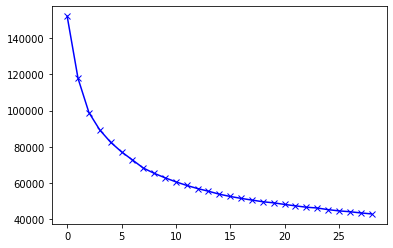

In [13]:
# visualize results
plt.plot(cost, 'bx-')
plt.show()

#### Task: Clustering on "optimal" number of clusters

Use the plot from above, to infer the "optimal" number of clusters. Use the cell below to answer this task.

In [14]:
# lets assume we have chosen 6 as the optimal number of clusters
kmean= KMeans(6, random_state=42)
kmean.fit(X)
labels=kmean.labels_

In [15]:
# use your own labels for each data point obtained from the previous step and add it to the dataframe
# the variable 'labels' should be supplied by you in the previous step
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1,9,1,0,1,0,2,0,1,0,0,1,2,1,1,0,12,5
1,4,10,0,0,0,5,0,0,0,3,1,0,5,4,3,3,12,1
2,3,10,2,2,0,0,10,10,0,0,0,3,5,2,2,0,12,0
3,3,7,3,3,0,1,1,1,0,1,1,1,5,0,2,0,12,5
4,2,10,1,1,0,0,1,1,0,0,0,1,3,2,1,0,12,5


### Interpretation of clusters

Now we can start interpreteting the clusters. For this purpose, we visualize all features with respect to the found clusters.

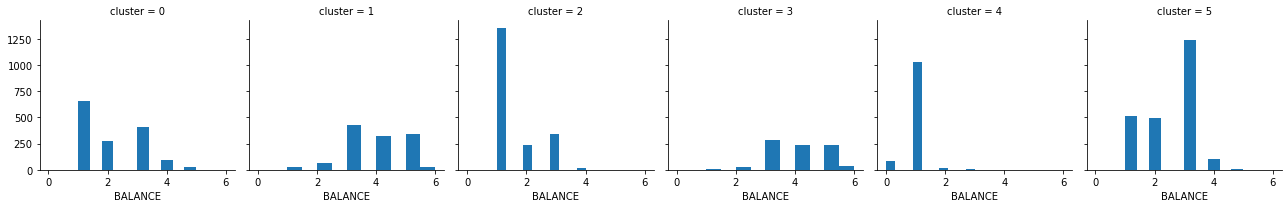

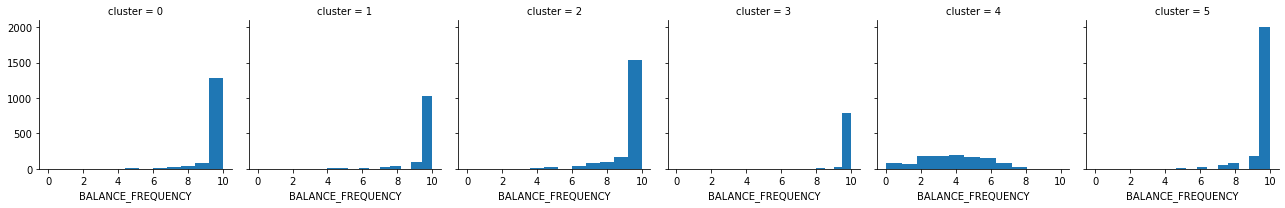

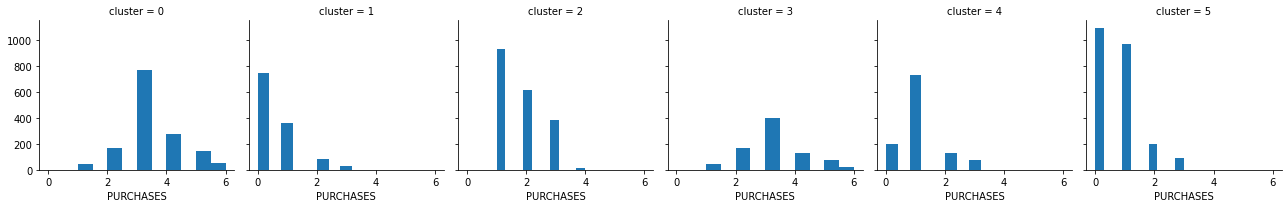

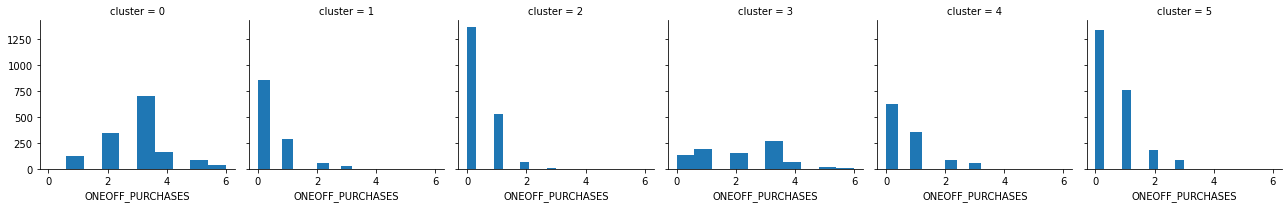

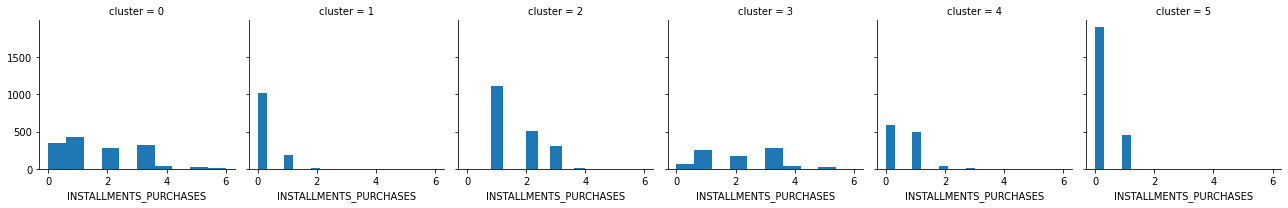

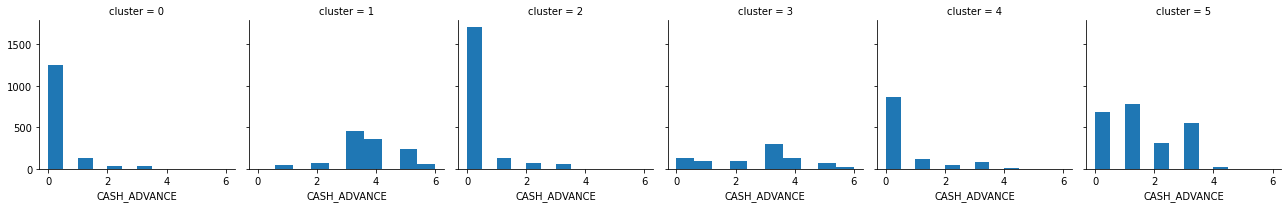

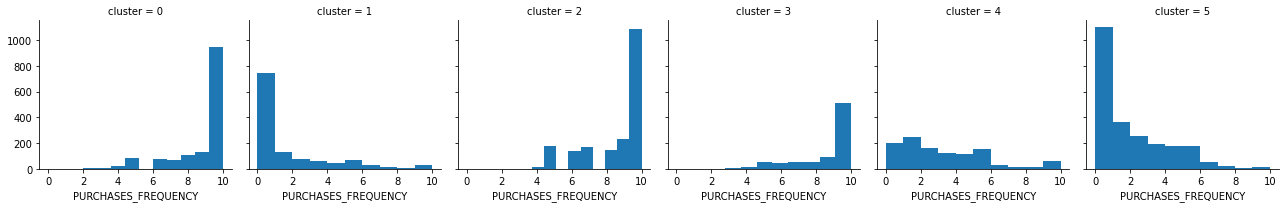

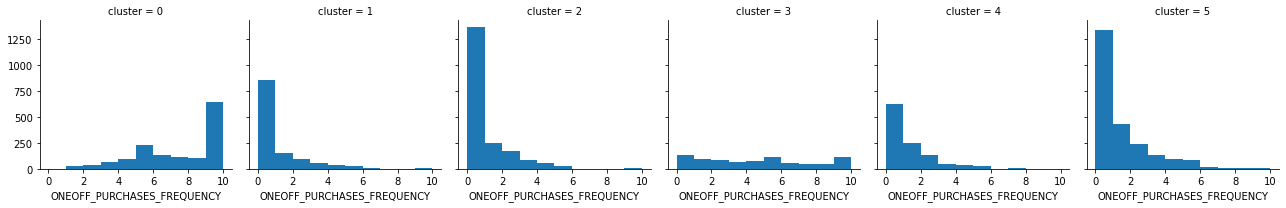

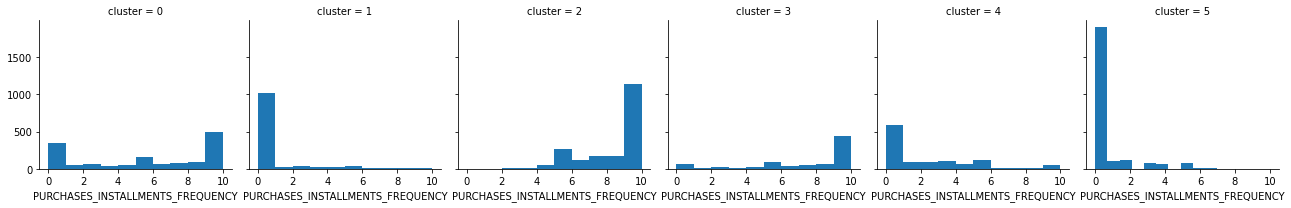

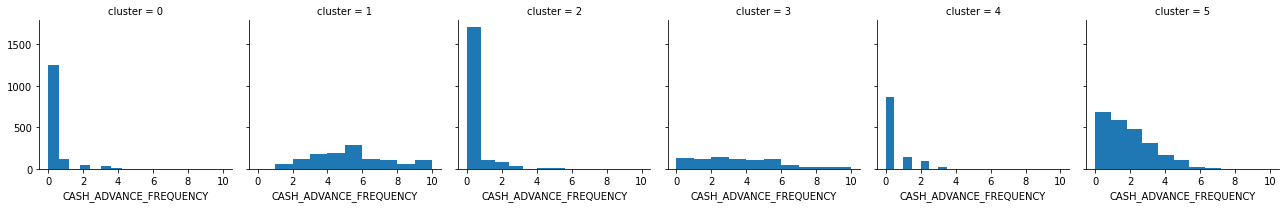

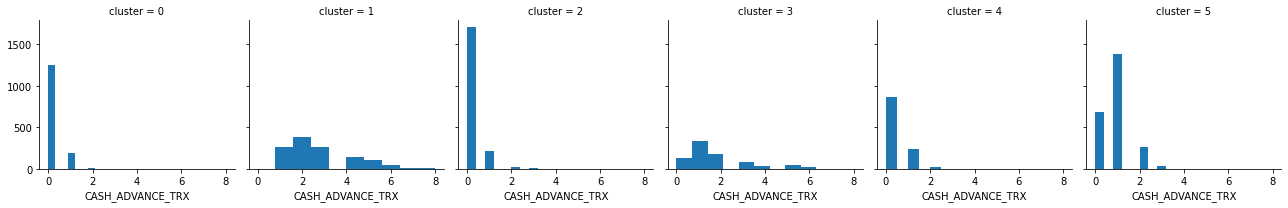

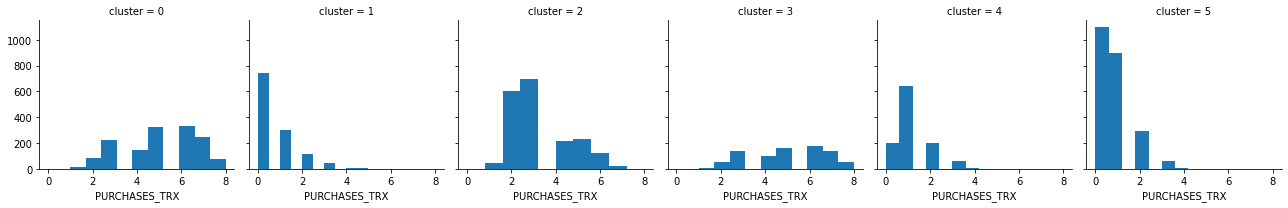

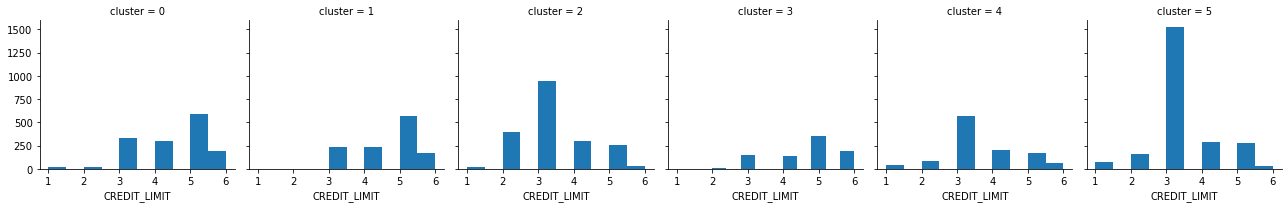

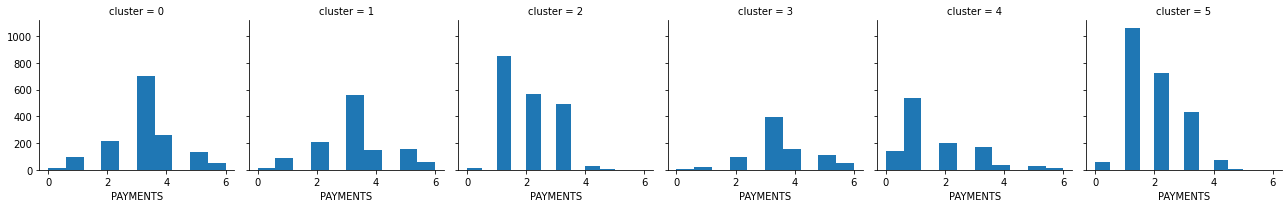

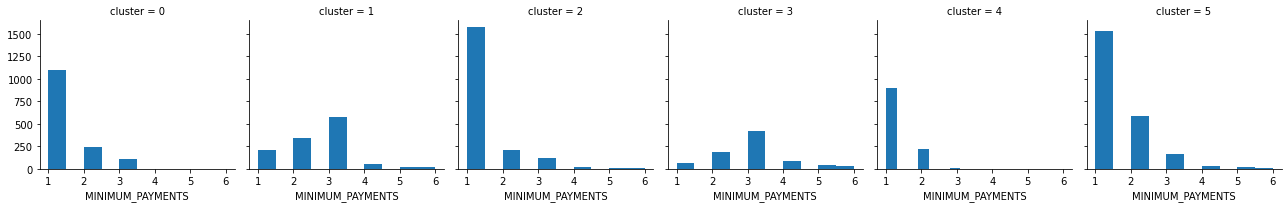

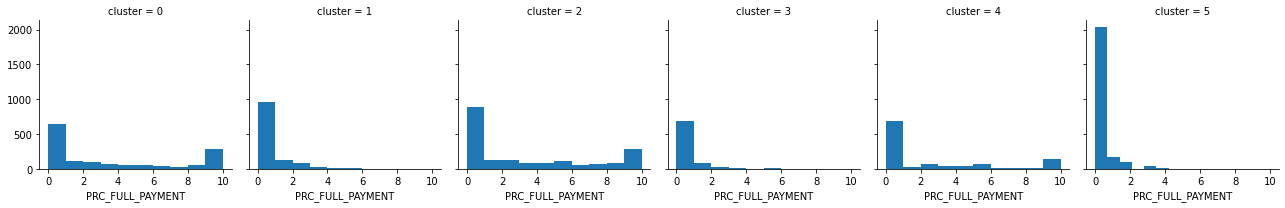

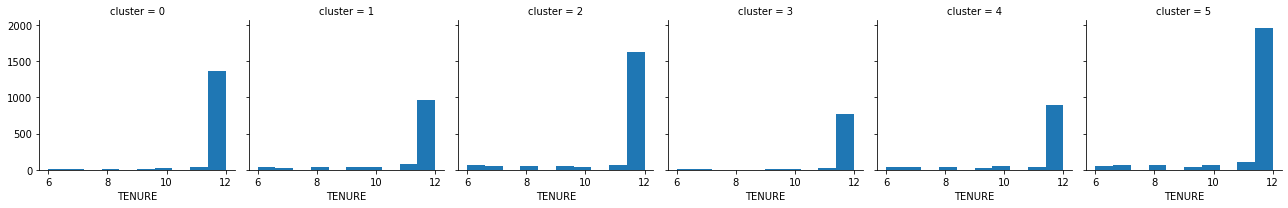

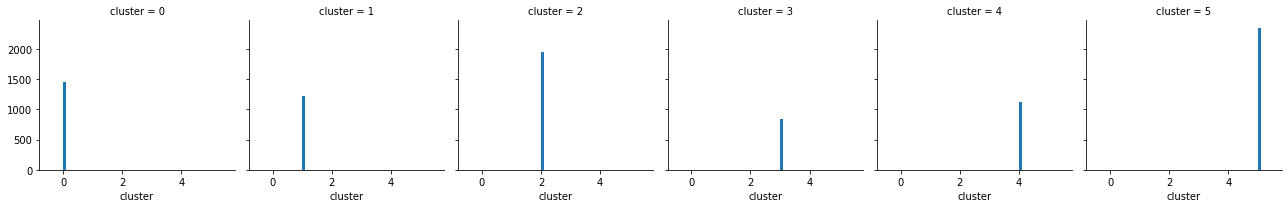

In [16]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

#### Task: Describe the clusters you have found in your own words. 
Use this cell for your answer.

* **Cluster 0**: 
    - People with high credit limit
    - People with a high amount of purchases
    
    
* **Cluster 1**: 
    - The people in this group have an average to high balance on their account. 
    - They purchase only occasionally and use advance cash more often 
    
    
* **Cluster 2**: 
    - People who take almost never pay with advance cash
    - They purchase frequently with installments    
    


* **Cluster 3**: 
    - People with average to high credit limit
    - They make all type of purchases
    


* **Cluster 4**: 
    - Less money spenders with average to high credit limits
    - They have a low balance on their account
    

* **Cluster 5**:
    - People who don't spend much money 
    - They have an average credit limit
    

### Visualization of clusters

Now we have derived meaningful clusters from the credit card user behaviour. To further inspect our results, we will visualize the clusters. 

#### Task: Visualize clusters
Currently, our feature space has more than 2 dimensions. This makes it difficult to plot our results. Hence, we need to transform our feature space into a 2D projection. In case of PCA, we simply set the number of components to 2 and transform our dataset. Afterwards, we can visualize the results. To get started with PCA, you can have a look at [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). To visualize the results, you can use [matplotlib](https://matplotlib.org/).

In [17]:
# Apply PCA
X_PCA = PCA(2).fit_transform(X)
X_PCA.shape

(8950, 2)

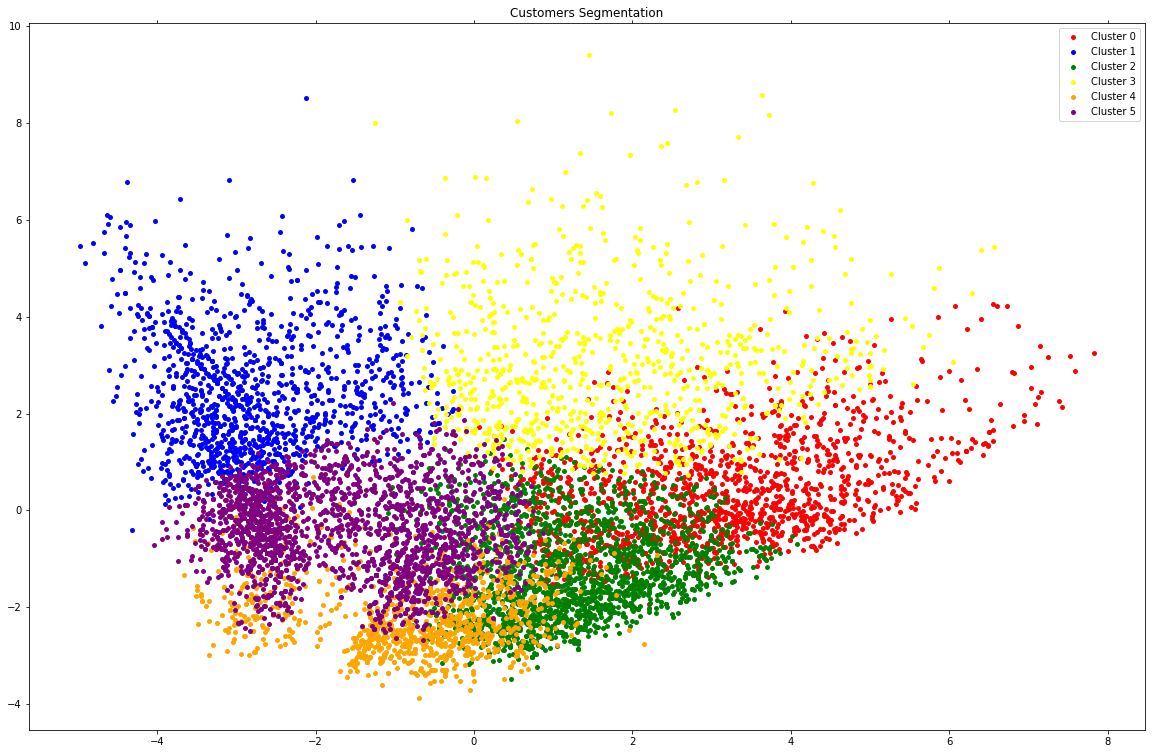

In [18]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         4: 'Cluster 4',
         5: 'Cluster 5'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation")
plt.show()